# Introduction to Deep Q Learning

## CSCI E-82A

## Stephen Elston

To date we have only considered reinforcement learning problems with a small number of **discrete states**. So far, we have applied **tabular algorithms** to the solution of RL problems. However, tabular methods will not work in cases where the tables are too large to be held in computer memory or where states are not discrete values. 

But, many practical problems have eight very large numbers of discrete states or have continuous states. Some example of such problems:  
1. A Game such as chess or backgammon with a great number of possible board states. While the number of states is **countably finite** there are far too many for tabular solutions. For example, consider that each piece in a chess game can occupy any of 64 positions, and that there are anywhere between 32 pieces and 2 pieces on the board at a given time step. This situation leads to an explosion in possible states. Other games, such a Go, have far more states than chess.   
2. A simple flight control system for a drone which has an infinite number of states in terms of 3-dimensional velocity, acceleration, and position, along with pitch yaw and role. All 12 of these variables have **continuous values** and, thus, an **infinite number of states**.   

To address such problems we must have a better representations. In this lesson we will focus on a powerful class of representations known as **function approximation**. By using function approximation we can represent a large number of states, even an infinite number, with a limited number of **parameters**. Using function approximation problems of great complexity can be tackled, at least in theory.  

A reinforcement learning agent using function approximation is illustrated schematically in the figure below. 

<img src="img/AgentEnvironment.JPG" alt="Drawing" style="width:500px; height:300px"/>
<center> **Reinforcement Learning Agent with Function Approximation Representation and Environment** </center>  

In this lesson we will only address function approximation methods for **episodic** tasks. 

>**Suggested reading:** The following sections of Sutton and Barto, second edition, provide additional scope for the topics of this lesson: 9.1, 9.2, 9.3, 9.4, 9.5, 10.1, and 10.2.

>**For further exploration:** The resources of [Open AI Gym](https://gym.openai.com/) provide a rich set of simulators along with a framework to help you construct and test RL algorithms. 

>**Code examples in depth:** *Deep Reinforcement Learning Hands-On* by Maxim Lapan, Packt, 2018, provides considerable detail on deep Q learning. The book contains in-depth examples and discusses important implementation details. The examples in this book use the PyTorch deep learning framework. 

In order to run all of the examples in this notebook you will need to install [Keras](https://keras.io/) and h5py; `pip install h5py`.

## Representation for Non-Tabular RL

The main question we will address in this lesson is what representations can we use when tabular methods will not work. The idea key idea is to **encode** a large, possibly infinite, number of states with a **few parameters**. Thus, **state values** or **action values** are represented by some **function of the state** of the environment.  

There are, in fact, many possible approaches to this problem. Here we will focus on function approximation methods of which a few examples are: 
1. Simple **linear** and **polynomial** representations,
2. **Fourier basis function** representations,
3. **Course coding** using overlapping circular or elliptical regions,
4. Various forms of **tile coding**,
5. **Radial basis functions** or kernels,
5. **Fully connected** deep neural networks, 
6. **Convolutional** deep neural networks. 

Each of the first five methods involve **coding** using some type of **basis function**. Basis functions rely on an implicit assumption that **nearby states have similar values**.  The representation is then **linear in the parameters** and **linear solution methods** are used to find these parameters. Linear methods have the advantage of computational efficiency. Further, at least for **on-policy** algorithms, **convergence is guaranteed**.     

The deep neural networks provide a distinctly nonlinear function approximation method. Typically, deep neural networks are used for **off-policy Q-Learning** methods. The convergence properties of these algorithms can be problematic. In fact, there are few guarantees of convergence with **off-policy function approximation** algorithms.     

### Tile coding

Tile coding is a flexible and expressive function approximation method. The basic idea is simple. The **state space is divided** into small patches using a regular pattern of **geometric shapes** or **tiles**. The function approximation has one parameter (weight) for each tile.    

An example tile coding of a two dimensional state space is shown in the figure below. In this case, a uniform 8x8 set of tiles are used, leading to a representation with 64 parameters. 

<img src="img/Tile1.JPG" alt="Drawing" style="width:300px; height:300px"/>
<center> **Two-dimensional state space encoded by 8x8 rectangular tiles** </center>

In the above diagram the states shown by **X** are in the same tile and will be coded with the same parameter. The states show by **O** are in different tiles and are coded with different parameters. 

However, the tile codings are far from unique. Consider the tiling of the same state space shown in the figure below. In this case the tiles are a 4X16 grid. As in the first case, there are still 64 parameters. 

<img src="img/Tile2.JPG" alt="Drawing" style="width:300px; height:300px"/>
<center> **Two-dimensional state space encoded by 4x16 rectangular tiles** </center>

In the above coding the states shown with **O** are in the same tile and represented by the same parameter. But, the states shown as **X** are now in different tiles and are represented by different parameters. 

A great many tile coding schemes are possible. Commonly, multiple tiling schemes are used simultaneously. This practice allows for the capture of information at **different scales**. 

### Deep neural networks

Deep neural networks are powerful function approximation methods. In most cases one of two deep neural network architectures are used:
1. Fully connected network are used for cases where there are complex and highly nonlinear relationships between state values or action values. 
2. Convolutional networks are useful for cases where there is value coherency between adjacent states. Common examples include images and time series data.  

In principle deep neural networks can approximate even highly complex nonlinear functions. Neural networks have been reviewed in a previous lesson. Here, we will just summarize some of the drawbacks of this attractive representation. 
1. Given the large number of parameters a large number of episodes are required for training. It is not unusual for several tens of millions of episodes to be required. Therefore, training time can be significantly longer than for other algorithms.
2. As a result of the large number of parameters (high degrees of freedom) over-fitting is a constant problem. Careful attention must be paid to regularization methods. 
3. Deep neural network are known to have **brittle behavior**, wherein small changes in the input can result in surprising or unexpected predictions.

The foregoing not withstanding, trained neural network models can be reasonably computationally efficient. In fact, prediction using trained neural network models is preformed routinely, even in embedded environments. 

## Linear Function and Stochastic Gradient Decent

Following the discussion above, basis function methods are linear in their parameters. In the following we will express these parameters as a vector of model weights, $\mathbf{w}$. We can then represent the approximate state value function with state $x(s)$ as:

$$\hat{v}(s,\mathbf{w}) = \mathbf{w}^T \mathbf{x}(s) =  \sum_{i=1}^d   w_i  x_i(s)$$

In principle, **stochastic gradient decent** algorithms are an efficient way to solve for the weights, $\mathbf{w}$. At each step the update is just:

$$\mathbf{w}_{t+1} = \mathbf{w}_t + \alpha\ E_{\hat{p}data}\Big[ \nabla_{w} J(\mathbf{w}_t) \Big]\\
= \mathbf{w}_t + \alpha  \big[v_{\pi}(s) - \hat{v}(S_t, \mathbf{w}_t) \big]\nabla_w \hat{v}(S_t,\mathbf{w}_t)$$

where, $\hat{p}data$ is the mini-batch, and gradient is given by:   

$$\hat\nabla_w {v}(S_t,\mathbf{w}_t) = 
\begin{bmatrix} 
\frac{\partial \hat{v}(S_t,\mathbf{w}_t)}{\partial w_1} \\
\frac{\partial \hat{v}(S_t,\mathbf{w}_t)}{\partial w_2} \\
\vdots \\
\frac{\partial \hat{v}(S_t,\mathbf{w}_t)}{\partial w_d}
\end{bmatrix}$$


In many practical algorithms, $\hat{v}(s)$ is a **bootstrapped** approximation. This means are error term and gradient are not exact. We call such algorithms **semi-gradient decent** methods as they use an approximation of the gradient. This approach generally works well, but does not have the strong convergence guarantees of stochastic gradient decent. 

## Function Approximation Error

As already noted, when tabular algorithms are not feasible, we must resort to function approximation. We can use function approximation for both state values, $\hat{v}(s)$, and action values, $\hat{q}(s,a)$. We should always keep in mind that we are dealing with **approximations** and will never know the true state values, $v_{\pi}(s)$, and action values, $q_{\pi}(s,a)$. There will always be some **error** between the true values and the approximated values. For example, for state value approximation we can express this error as the **mean squared value error**:

$$\overline{VE}(\mathbf{w}) = \sum_{s \in S} \mu(s) \Big[ v_{\pi}(s) -  \hat{v}(s,\mathbf{w}) \Big]^2$$  

Here, $\mu(s)$ is a weight indicating home important the state $s$ is. For on-policy RL, $\mu(s)$ is a probability known as the **on-policy distribution**. 

A similar error metric can be constructed for $\hat{q}(s,a)$.  

In practical terms there is a trade-off between the complexity of the approximate representation and the error. More complex representations require more parameters, but have lower error and vice versa. This situation is exactly analogous to the bias-variance trade-off, familiar from machine learning.   

## The Mountain Car Problem

The [mountain car problem](https://en.wikipedia.org/wiki/Mountain_car_problem) was first proposed in the [Andew Moore's Ph.D. dissertation (1990)](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.17.2654). The mountain car problem has become a canonical testbed for many reinforcement learning algorithms. 

In this problem an under-powered car must climb a steep hill. However, the car does not have sufficient engine power to climb the grade. The car must travel up another hill in order to gain sufficient speed (actually kinetic energy) to climb the large hill. 

The position, $x$, and velocity, $\dot{x}$, of the car are the state variables. The updates of the state variables at each time step are determined by the following equations: 

$$x' = x + \dot{x} \\
\dot{x}' = \dot{x} + 0.001 * \ddot{x} - 0.0025 * cos(3 * x)$$

The object of this problem is to find the optimal acceleration given the car state to allow the car to get to the top of the hill. The car has three acceleration states, $\ddot{x}$, which must be selected by the agent:

$$\ddot{x} = \{ -1.0, 0.0, 1.0 \}$$

The position and velocity are bounded, with the goal at the upper bound of position:

$$-1.2 \le x \le 0.5 \\
-0.07 \le \dot{x} \le 0.07$$

The reward at each time step is -1.0 and the reward for reaching the goal is 100.  

The car is randomly initialized using a uniform distribution:

$$p(x_0) = uniform(-0.6 \le x_0 \le -0.4)$$

### The mountain car problem is hard

At first glance, the mountain car problem may seem like it should have an easy solution. However, looks are deceptive. The learning an optimal policy for this problem is difficult. In fact, conventional control theory approaches fail to provide solutions. Some reasons for this difficulty include:
1. The non-linear coupling between the two state variables, which makes the state transitions between the infinite number of states hard to predict.
2. The delayed reward which is only observed when the goal is achieved. This fact is common to many difficult RL problems. 

## Q-Learning and Function Approximation

### Instability of Q-learning with function approximation

Recall the single step Q-learning or **Q-learning(0)** update is:

$$Q(S_t,A_t) = Q(S_t,A_t) + \alpha \big[ R_{t+1} + \gamma\ max_a Q(S_{t+1},a) - Q(S_t,A_t) \big]$$  

Where,   
$\delta_t = R_{t+1} + \gamma max_a Q(S_{t+1},a) - Q(S_t,A_t) = $ the TD error,   
$max_a = $ the maximum operator applied to all possible actions in state $S_{t+1}$,   
$Q(S_t,A_t) = $ is the action value in state S given action A,  
$R_{t+1} = $ is the reward for the next time step,   
$\alpha = $ the learning rate,   
$\gamma = $ discount factor.  

But, what happens when we try to use a function approximator? Using, $\hat{Q}(S_t,A_t, w_t)$, the function approximation, the Q-learning update becomes:   

$$\hat{Q}(S_t,A_t, w_t) = \hat{Q}(S_t,A_t, w_t) + \alpha \big[ R_{t+1} + \gamma\ max_a \hat{Q}(S_{t+1},a, w_t) - \hat{Q}(S_t,A_t, w_t) \big]$$  

The above relationship uses the $max$ operator, a **nonlinear operation**. But, the weight vector, $\mathbf{w}$, of the function approximator, $\hat{Q}(S_t,A_t, \mathbf{w})$, must minimize the error:   

$$\overline{VE}(\mathbf{w}) = \sum_{s \in S} \mu(s) \Big[ q_{\pi}(s,a) -  \hat{q}(s,a, \mathbf{w}) \Big]^2$$ 

The above is a **least squares minimization** relationship. 

The combination of the TD update using the max operator and the function approximation $\hat{Q}(S_t,A_t, w_t)$ which minimizes the least squares errors is problematic. Not only are there no convergence guarantees, the TD iteration is generally unstable.

The aforementioned problem is not unique to Q-learning. In fact, the problem arises with all off-policy algorithms. This problem has been call the **the deadly triangle of off-policy learning, function approximation, and TD updates**. It is possible to do two of the three, but not all three.  

### Q-Learning as a regression problem

We have just seen that combining TD updates with Q-learning and function approximation does not work. So, how can Q-learning be applied with function approximation?   

We can transform the learning problem into a regression problem. 

$$\mathbf{w}_{t+1} = \mathbf{w}_t + \alpha  \big[R_{t+1} + \gamma\ \underset{a}{max}\ Q_{\pi}(s_{t+1},a_{t+1}) - \hat{Q}(s_t, a_t, \mathbf{w}_t) \big]\nabla_w \hat{Q}(s_t, a_t,\mathbf{w}_t)$$

The regression sum of squared error term to be minimized is:  

$$\sum \delta_t^2 = \sum \big( G_t - \hat{Q}(s_t, a_t, \mathbf{w}_t) \big)^2$$   

Where the gain is:    

$$G_t = R_{t+1} + \gamma\ \underset{a}{max}\ Q_{\pi}(s_{t+1},a, \mathbf{w})$$

The gradient with respect to the parameters or weight vector, $\mathbf{w}$, is defined as:    

$$\hat\nabla_w {q}(S_t, A_t,\mathbf{w}_t) = 
\begin{bmatrix} 
\frac{\partial \hat{v}(S_t, A_t, \mathbf{w}_t)}{\partial w_1} \\
\frac{\partial \hat{v}(S_t, A_t, \mathbf{w}_t)}{\partial w_2} \\
\vdots \\
\frac{\partial \hat{v}(S_t,A_t, \mathbf{w}_t)}{\partial w_d}
\end{bmatrix}$$

Assuming the function approximator has a continuous derivative the gradient can be computed. In this case, the approximator can be learned using **stochastic gradient descent**.   

### The DQN algorithm

Deep neural networks are powerful function approximators. The DQN algorithm uses a **deep neural network linear regression** to learn a Q function approximator. The **loss function** for this regression problem can be written:     

$$J(\mathbf{w}_t) = \frac{1}{2} \parallel G_t - \hat{Q}(s_t, a_t, \mathbf{w}_t)   \parallel^2$$

But, this regression problem is not standard. The value of $Y_t$ must be computed using **bootstrap estimates**. This situation can lead to **instability and non-convergence**. The DQN algorithm solves this problem by using two neural network models:    
1. An **online model** which learns $\hat{Q}(S, A, \mathbf{w}_t)$, the action-value approximation function. 
2. A **target model** for the bootstrap estimate of $Q_{\pi}(S,A,\mathbf{w}^-)$. This model is updated periodically by creating a copy of the online model, $\mathbf{w} \rightarrow \mathbf{w}^-$. The weights of the the target model, $\mathbf{w}^-$, are frozen between updates.   

Thus the gain for the DQN algorithm can be expressed:

$$G_t^{DQN} = R_{t+1} + \gamma\ \underset{a}{max}\ Q_{\pi}(s_{t+1},a_{t+1}, \mathbf{w}_t^-)$$

There is one important component needed for the the complete DQN algorithm, the **replay buffer**. The stochastic gradient descent requires mini-batch samples. But sampling an environment is a sequential operation. The replay buffer accumulates a large number of data samples. When the capacity of the buffer is reached, older samples are removed from the buffer. At the minimum, the replay buffer contains:

- The bootstrap gain for the sample, $G_t$, from the target model.
- The action-value estimate from the online model, $\hat{Q}(s_t, a_t, \mathbf{w}_t)$.  
- The state information from the environment.

The concept of the replay buffer is illustrated below. The time steps as data are added and then removed run from left to right.  

<img src="img/ReplayBuffer.JPG" alt="Drawing" style="width:600px; height:300px"/>
<center> **Example of adding samples to the replay buffer** </center>

The key components of the DQN algorithm and their relationships are shown illustrated in the diagram below.

<img src="img/DQN.JPG" alt="Drawing" style="width:600px; height:250px"/>
<center> **Key components of the DQN algorithm** </center>y

### Simulation of car environment

The code in the cell below **simulates the car environment**. Two functions are used by the agent to interact with the environment:
1. The `sim_car` function returns a state transition and a reward, given the agent's current state and an action. In addition, a flag is returned to indicate if the goal has been reached.
2. The `initialize_car` function returns a random starting position for the car within the specified bounds. 

Taken together, calls to these two functions define the **boundary between the agent and the environement**. Execute the code in the cell below to exercise these functions and examine the resulting plots for a case where the acceleration is set to 0. 

>**Note:** An Open AI Gym [environment simulator](https://gym.openai.com/envs/MountainCarContinuous-v0/) for the mountain car problem is available. 

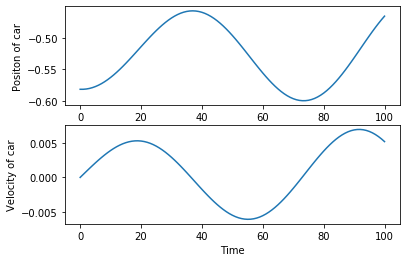

In [13]:
from math import cos
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

def sim_car(x, x_dot, acceleration, x_lims = (-1.2,0.5), x_dot_lims = (-0.07,0.07)):
    ## Compute velocity within limits
    x_dot_prime = x_dot + 0.001 * acceleration - 0.0025 * cos(3.0 * x)
    if(x_dot_prime < x_dot_lims[0]): x_dot_prime = x_dot_lims[0]
    if(x_dot_prime > x_dot_lims[1]): x_dot_prime = x_dot_lims[1]
        
    ## Now update position
    x_prime = x + x_dot
    if(x_prime < x_lims[0]): x_prime = x_lims[0]
    if(x_prime > x_lims[1]): x_prime = x_lims[1]
      
    ## At the terminal state or not and set reward
    if(x_prime >= x_lims[1]): 
        done = True
        reward = 100.0
    else: 
        done = False
        reward = -1.0
        
    return(x_prime, x_dot_prime, done, reward)    
        
def initalize_car(x_lims = (-0.6,-0.4)):
    ## Find random start for car
    return(nr.uniform(x_lims[0],x_lims[1]))

## Test the function
a = -0.0
x_dot = [0.0]
x = [initalize_car()]
for i in range(100):
    x_temp, x_dot_temp, done, reward = sim_car(x[i], x_dot[i], a)
    x.append(x_temp)
    x_dot.append(x_dot_temp)
    
def plot_car(x, x_dot):    
    ## Plot car position
    fig = plt.figure()
    ax1 = fig.add_subplot(211)    
    ax1.plot(x)
    ax1.set_ylabel('Positon of car')
    
    ## PLot car velocity
    ax2 = fig.add_subplot(212)  
    ax2.plot(x_dot)
    ax2.set_ylabel('Velocity of car')
    ax2.set_xlabel('Time')
    
plot_car(x,x_dot)    

With no acceleration applied, the car oscillates back and forth. The motion is not damped since the simulator includes no friction term. 

## Deep NN Function Approximation for the Mountain Car Problem

A general, but computationally intensive, solution to the mountain car problem can be obtained using **deep Q-Learning**. Here we use a neural network model as a function approximator for the action values, $\hat{q}(S_{t}, A_{t}, w_{t})$.   

The code in the cell below defines a simple neural network model to approximate the action values for the mountain car problems. A few key points include:
- There are three input variables, the two state variables, position and velocity, along with the action. 
- A single hidden layer of 20 units is used. This is a rather spare representation, but is chosen for convenience of the demonstration rather than accuracy. 
- Since over-fitting is a constant problem with neural networks three regularization methods are applied, l2 regularization, dropout regularization and early stopping. 
- Since this is a regression problem, to approximate the numeric action value, the output layer consists of a single unit with linear activation. 

Execute this code to run the simple test case.

>**Note:** The code shown in this notebook is intended to illustrate the basic concepts of deep Q-Learning. For more robust solutions you are advised to look at the contributed [keras-rl package](https://github.com/keras-rl/keras-rl).

In [14]:
import keras
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras.layers import Dropout
from keras import regularizers

def DL_model():
    ## Define the Keras model
    function_approx = models.Sequential()
    function_approx.add(layers.Dense(3, activation = 'relu', input_shape = (3,), 
                                     kernel_regularizer=regularizers.l2(0.01)))
    function_approx.add(Dropout(0.5)) # Use 50% dropout
    function_approx.add(layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.1)))
    function_approx.add(Dropout(0.5)) # Use 50% dropout
    function_approx.add(layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.1)))
    function_approx.add(Dropout(0.5)) # Use 50% dropout
    function_approx.add(layers.Dense(1, activation = 'linear'))
    function_approx.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    ## Define the callback list for early stopping   
    filepath = 'my_model_file.hdf5' # define where the model checkpoints are saved
    callbacks_list = [keras.callbacks.EarlyStopping( #monitor = 'val_loss', patience = 1)
            monitor = 'val_loss', # Use loss to monitor the model
            patience = 1 # Stop after one step with lower accuracy
        ),
        keras.callbacks.ModelCheckpoint(
            filepath = filepath, # file where the checkpoint is saved
            monitor = 'val_loss', # Don't overwrite the saved model unless val_loss is worse
            save_best_only = True # Only save model if it is the best
        )
    ]
    return(function_approx)
function_approx = DL_model()
function_approx.predict(np.array([[0.1,0.1,0.0]]))

array([[-0.01124915]], dtype=float32)

In [15]:
function_approx.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 3)                 12        
_________________________________________________________________
dropout_16 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                256       
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total para

The code in the cell below preforms greedy selection of the next action. The neural network is used to predict the action value for each possible action and the maximum is selected. Execute this code to run the simple test case. 

In [16]:
def compute_Q_values(x,x_dot,x_prime,x_dot_prime,action,actions,gamma,epsilon,online_model,target_model):
    '''This function representst the core of the DQN algorithm. The function 
    generates a sample state transiton and associtated Q values using the 
    current models. The next state and action, along with an indicator if done 
    are returned.'''
    Q_target = []
    ## Iterate over all actions to find target Q values
    for a in actions:
        Q_target.append(target_model.predict(np.array([[x_prime,x_dot_prime,a]]))[0][0])
    ## Find the next action using epsilon greedy algorithm
    if(nr.uniform() <= epsilon): # take random aciton
        max_index = nr.choice(range(len(actions)), replace = True)
    else: # take greedy action with max Q
        max_index = np.argmax(Q_target)
    ## Get the next action from the successor state
    action_prime = actions[max_index]
    
    ## Find Q from the online model for the the action selected 
    Q_online = online_model.predict(np.array([[x,x_dot,action]]))[0][0]
    
    ## Update x and x_dot
    x = x_prime
    x_dot = x_dot_prime
    
    ## Find the next state, reward and if done
    x_prime, x_dot_prime, done, reward = sim_car(x, x_dot, action_prime)
    ## update the Q target, for cases of terminal or not
    if(done): 
        Q_out = reward
    else:
        Q_out = reward + gamma * Q_target[max_index]
    return(x, x_dot, x_prime, x_dot_prime, action_prime, done, Q_out, Q_online) #, actions[max_index], max_index)

## Simple test of the funciton using a random model for both online and target
actions = [-1.0,0.0,1.0]        
compute_Q_values(0.1,0.0,0.1,0.1,0.0,actions,0.9,0.05,function_approx,function_approx)    

(0.1, 0.1, 0.2, 0.07, 0.0, False, -1.0101242309436202, -0.0025114187)

The code in the cell below execute a simple Q-Learning algorithm using the previously defined neural network model as the function approximator. Some important points for this algorithm are:
1. An $\epsilon$-greedy approach is used to select actions. 
2. The target action value,  $\hat{q}(S_{t}, A_{t}, w_{t-1})$, used to train the neural network model is the 1-step bootstrapped reward estimate. 

Some additional details of the algorithm can be learned by reading the code comments. 

Execute this code for just 10 episodes and examine the results. This will take some time. 

In [17]:
def copy_model(online_model, target_model):
  target_model.set_weights(online_model.get_weights())  

In [18]:
def replay_buffer(new_cases, buffer, n_cases = 128*64): # n_cases = 4096):
    """Function manages replay buffer as a numpy array with
    maximum size of n_cases. Newest data is retained once
    more than n_cases available"""
    if(buffer.shape[0] <= n_cases): 
        ## still growing buffer so append old cases to new
        out = np.append(new_cases, buffer, axis = 0)
    else: ## Delete some rows and add the new at the top
        ## Create a mask for the rows we wish to keep or delete
        del_rows = n_cases - new_cases.shape[0] + 1
        mask = np.ones(buffer.shape[0], dtype=bool) 
        mask[del_rows:] = False
        ## Append old cases to new 
        out = np.append(new_cases, buffer[mask,:], axis = 0)
    return(out)

b = np.zeros((3,2))
add = np.ones((1,2))
for _ in range(6):
    b = replay_buffer(add, b, 4)
    print(b)
    print('')
    

[[1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]]

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]]

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]



In [19]:
def sample_time_steps(x, x_dot, x_prime, x_dot_prime, action, online_model, target_model, replayBuffer, gamma, epsilon, actions, n_samples = 128):
    '''Function to sample an number of episode using the online model.
    The samples are placed in the replay buffer'''  
#    for _ in range(n_episodes):
    done = False
    i = 0
    ## Compute the required number of samples or quite when terminal
    while((i < n_samples) and (not done)):
        ## Compute the values for the time step
        x, x_dot, x_prime, x_dot_prime, action, done, Q_target, Q_online = compute_Q_values(x,x_dot,x_prime,x_dot_prime,action,actions,gamma,epsilon,online_model,target_model) 
        ## Add new values to the replay buffer
        newCase = np.array([x,x_dot,Q_online,Q_target]).reshape((1,4))
        replayBuffer = replay_buffer(newCase, replayBuffer)
        ## Increment the count of samples
        i += 1
    return replayBuffer, x, x_dot, x_prime, x_dot_prime, action

## Very simple purely operational test case for function
## first initialize a numpy buffer array with
## elements, x, x_dot, Q_online, Q_target  
x_knot = 0.0
x_dot_knot = 0.0
test_buffer = np.array([x_knot,x_dot_knot,0.0,0.0]).reshape((1,4))
actions = [-1.0,0.0,1.0]  
sample_time_steps(x_knot, x_dot_knot, 0.0, 0.1, 1.0, function_approx, function_approx, test_buffer, 0.9, 0.05, actions, n_samples = 16)

(array([[ 4.89450263e-01,  6.01648470e-02, -1.60819665e-02,
          1.00000000e+02],
        [ 4.28582405e-01,  6.08678585e-02, -1.46239605e-02,
         -1.01447377e+00],
        [ 3.66579977e-01,  6.20024282e-02, -1.31624620e-02,
         -1.01316156e+00],
        [ 3.03041456e-01,  6.35385203e-02, -1.16844997e-02,
         -1.01184622e+00],
        [ 2.37611659e-01,  6.54297975e-02, -1.01771336e-02,
         -1.01051605e+00],
        [ 1.70000000e-01,  6.76116588e-02, -8.62782821e-03,
         -1.00915942e+00],
        [ 1.00000000e-01,  7.00000000e-02, -8.73772427e-03,
         -1.00776505e+00],
        [ 0.00000000e+00,  1.00000000e-01, -3.65715288e-03,
         -1.00786395e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]]),
 0.4894502632295354,
 0.06016484703078046,
 0.5,
 0.05990918094254507,
 0.0)

In [20]:
def DQN(n_cycles = 96, samples_step = 16, gamma = 0.99, epsilon = 0.05, 
               target_update_cycles = 8, batch_size = 32, x_knot = 0.0, x_dot_knot = 0.0,
               a_knot_prime = 0.0, x_dot_knot_prime = 0.0, action_knot = 0.0,
               train_epochs = 1):
    ## Possible actions
    actions = [-1.0,0.0,1.0]
    
    ## Define the Keras models
    target_model = DL_model()
    online_model = DL_model()
    
    ## Initialize replay buffer
    replayBuffer = np.array([x_knot,x_dot_knot,0.0,0.0]).reshape((1,4))

    ## Loop over the training cycles
    T = 0  # Cycle counter
    for _ in range(n_cycles):
        
        ## Sample the environment, with random start on state
        done = False
#        while(not done):
        x = nr.uniform(-1.2,0.5)
        x_dot = nr.uniform(-0.07,0.07)
        action = nr.choice([-1.0,0.0,1], 1)
        x_prime, x_dot_prime, _, _ = sim_car(x, x_dot, action)
        replayBuffer, x, x_dot, x_prime, x_dot_prime, action = sample_time_steps(x, x_dot, x_prime, x_dot_prime, action, online_model, target_model, replayBuffer, gamma, epsilon, actions, n_samples = samples_step)
        
        ## Train the online model using the samples
        online_model.fit(replayBuffer[:,:3], replayBuffer[:,3], epochs = train_epochs, batch_size = batch_size)
    
        ## Update target model if enough cycles
        if((T % target_update_cycles) == 0): target_model.set_weights(online_model.get_weights())  
        
        ## Update counter
        T += 1
    
    ## Update the target model weights and return
    target_model.set_weights(online_model.get_weights())
    return(target_model)  

nr.seed(1235)
DQNModel = DQN()  

Epoch 1/1
17/17 [==============================] - 1s 63ms/step - loss: 7.9857 - mean_absolute_error: 0.9066
Epoch 1/1
33/33 [==============================] - 0s 272us/step - loss: 7.6604 - mean_absolute_error: 0.9071
Epoch 1/1
49/49 [==============================] - 0s 142us/step - loss: 7.1536 - mean_absolute_error: 0.8607
Epoch 1/1
65/65 [==============================] - 0s 230us/step - loss: 6.8284 - mean_absolute_error: 0.8415
Epoch 1/1
81/81 [==============================] - 0s 160us/step - loss: 6.4308 - mean_absolute_error: 0.8106
Epoch 1/1
97/97 [==============================] - 0s 144us/step - loss: 6.0436 - mean_absolute_error: 0.7467
Epoch 1/1
113/113 [==============================] - 0s 106us/step - loss: 5.6197 - mean_absolute_error: 0.6878
Epoch 1/1
129/129 [==============================] - 0s 131us/step - loss: 5.2468 - mean_absolute_error: 0.6359
Epoch 1/1
145/145 [==============================] - 0s 103us/step - loss: 4.8143 - mean_absolute_error: 0.5600
Epoch

1117/1117 [==============================] - 0s 82us/step - loss: 55.5413 - mean_absolute_error: 1.0963
Epoch 1/1
1133/1133 [==============================] - 0s 81us/step - loss: 54.5600 - mean_absolute_error: 1.0747
Epoch 1/1
1149/1149 [==============================] - 0s 129us/step - loss: 53.8845 - mean_absolute_error: 1.0612
Epoch 1/1
1165/1165 [==============================] - 0s 86us/step - loss: 53.0970 - mean_absolute_error: 1.0331
Epoch 1/1
1181/1181 [==============================] - 0s 120us/step - loss: 52.5014 - mean_absolute_error: 1.0472
Epoch 1/1
1197/1197 [==============================] - 0s 116us/step - loss: 52.0644 - mean_absolute_error: 1.0279
Epoch 1/1
1213/1213 [==============================] - 0s 81us/step - loss: 51.2914 - mean_absolute_error: 1.0362
Epoch 1/1
1229/1229 [==============================] - 0s 85us/step - loss: 50.3931 - mean_absolute_error: 1.0126
Epoch 1/1
1245/1245 [==============================] - 0s 85us/step - loss: 49.6593 - mean_abso

The number of time steps required to reach the goal for each episode seems reasonable. However, as you have, no doubt noticed, this time required for even these 10 episodes is rather lengthy. In reality, thousands or tens of thousands of episodes are likely required to find a good approximation for the action values. This approximation would then be used to find a greedy policy given state. 

In [21]:
def policy_time_step(x, x_dot, target_model, actions):
    '''Function uses a greedy policy to take a time step with the greatest action value
    as predicted by the target model. The function also returns if the episode is done''' 
    ## Find the action with the largest prediced value for the positon and velocity
    Q_target = []
    ## Iterate over all actions to find Q values
    for a in actions:
        Q_target.append(target_model.predict(np.array([[x,x_dot,a]]))[0][0])
    ## Find the action with max Q
    max_index = np.argmax(Q_target)
    ## Finally compute the state following the action with the highest value
    x, x_dot, done, reward = sim_car(x, x_dot, actions[max_index])
    return x, x_dot, actions[max_index], done


## Simple test case for the function
x = 0.0
x_dot = 1.0
for _ in (range(10)):
    x, x_dot, action, done = policy_time_step(x,x_dot,DQNModel,actions)
    print(x, x_dot, action, done)

0.5 0.07 1.0 True
0.5 0.07 1.0 True
0.5 0.07 1.0 True
0.5 0.07 1.0 True
0.5 0.07 1.0 True
0.5 0.07 1.0 True
0.5 0.07 1.0 True
0.5 0.07 1.0 True
0.5 0.07 1.0 True
0.5 0.07 1.0 True


Starting positon = -0.0


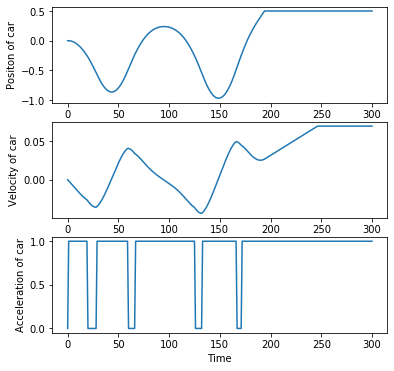

In [22]:
def plot_car_a(x, x_dot, a):    
    ## Plot car position
    fig = plt.figure(figsize = (6,6))
    ax1 = fig.add_subplot(311)    
    ax1.plot(x)
    ax1.set_ylabel('Positon of car')
    
    ## PLot car velocity
    ax2 = fig.add_subplot(312)  
    ax2.plot(x_dot)
    ax2.set_ylabel('Velocity of car')
    
    ## PLot acceleration
    ax2 = fig.add_subplot(313)  
    ax2.plot(a)
    ax2.set_ylabel('Acceleration of car')
    ax2.set_xlabel('Time')
    
## Initialize the car state
a = [0.0]
x_dot = [-0.0]
x = [-0.0]
print('Starting positon = ' + str(x[0]))

## Iterate until termination
i = 0    
done = False
#while(not done):
for i in range(300):    
    ## Update the position and velocity    
    x_temp, x_dot_temp, action, done = policy_time_step(x[i],x_dot[i],DQNModel,actions)
    x.append(x_temp)
    x_dot.append(x_dot_temp)
    a.append(action)
        
plot_car_a(x,x_dot,a)         

## Double DQN Algorithm

The bias inherent in Q-learning is well known. A recent advance intended to address this bias is the **Double DQN algorithm**.  

The approach of Double DQN is simple. The algorithm uses **two online models**. Each model periodically acts as the target model while the other model is updated. After some number of epochs, the roles are reversed. Samples created using both models in the two roles are added to the replay buffer. Alternating the roles of the models eliminates the bias.            

In [23]:
def double_DQN(n_cycles = 96, samples_step = 16, gamma = 0.95, epsilon = 0.001, 
               batch_size = 32, x_knot = 0.0, x_dot_knot = 0.0,
               train_epochs = 1):
    ## Possible actions
    actions = [-1.0,0.0,1.0]
    
    ## Define the Keras models
    model_1 = DL_model()
    model_2 = DL_model()
    
    ## Initialize replay buffer
    replayBuffer = np.array([x_knot,x_dot_knot,0.0,0.0]).reshape((1,4))

    ## Loop over the training cycles
    T = 0  # Cycle counter
    for _ in range(n_cycles):
        
        ## Prepare to sample the environment, with random start on state
        x = nr.uniform(-1.2,0.5)
        x_dot = nr.uniform(-0.07,0.07)
        action = nr.choice([-1.0,0.0,1], 1)
        x_prime, x_dot_prime, done, reward = sim_car(x, x_dot, action)
    
        ## Determine which model to treat as online and target by random choice
        if((T % 2) == 0):
            ## In this case model_1 is online and model_2 is target
            ## Sample  
            replayBuffer, x, x_dot, x_prime, x_dot_prime, action = sample_time_steps(x, x_dot, x_prime, x_dot_prime, action, model_1, model_2, replayBuffer, gamma, epsilon, actions, n_samples = samples_step)      
            ## Train the online model using the samples
            model_1.fit(replayBuffer[:,:3], replayBuffer[:,3], epochs = train_epochs, batch_size = batch_size)
        else:
            ## In this case model_2 is online and model_1 is target
            ## Sample  
            replayBuffer, x, x_dot, x_prime, x_dot_prime, action = sample_time_steps(x, x_dot, x_prime, x_dot_prime, action, model_2, model_1, replayBuffer, gamma, epsilon, actions, n_samples = samples_step)      
            ## Train the online model using the samples
            model_2.fit(replayBuffer[:,:3], replayBuffer[:,3], epochs = train_epochs, batch_size = batch_size)
            
        ## Update counter
        T += 1
    
    ## Return one of the models
    return(model_1)  

nr.seed(5678)
double_DQNModel = double_DQN()  

Epoch 1/1
17/17 [==============================] - 1s 57ms/step - loss: 7.9366 - mean_absolute_error: 0.9458
Epoch 1/1
33/33 [==============================] - 1s 45ms/step - loss: 7.9103 - mean_absolute_error: 0.9570
Epoch 1/1
49/49 [==============================] - 0s 122us/step - loss: 7.5837 - mean_absolute_error: 0.9718
Epoch 1/1
65/65 [==============================] - 0s 200us/step - loss: 7.3045 - mean_absolute_error: 0.9417
Epoch 1/1
81/81 [==============================] - 0s 148us/step - loss: 7.1229 - mean_absolute_error: 0.9539
Epoch 1/1
83/83 [==============================] - 0s 228us/step - loss: 127.4460 - mean_absolute_error: 2.1062
Epoch 1/1
99/99 [==============================] - 0s 141us/step - loss: 107.7341 - mean_absolute_error: 1.9204
Epoch 1/1
115/115 [==============================] - 0s 156us/step - loss: 93.5777 - mean_absolute_error: 1.7721
Epoch 1/1
120/120 [==============================] - 0s 116us/step - loss: 173.0848 - mean_absolute_error: 2.5595
E

1028/1028 [==============================] - 0s 83us/step - loss: 117.2433 - mean_absolute_error: 1.8304
Epoch 1/1
1044/1044 [==============================] - 0s 86us/step - loss: 113.1863 - mean_absolute_error: 1.8614
Epoch 1/1
1060/1060 [==============================] - 0s 99us/step - loss: 113.6560 - mean_absolute_error: 1.7706
Epoch 1/1
1076/1076 [==============================] - 0s 105us/step - loss: 110.4042 - mean_absolute_error: 1.8058
Epoch 1/1
1092/1092 [==============================] - 0s 86us/step - loss: 110.3576 - mean_absolute_error: 1.7557
Epoch 1/1
1093/1093 [==============================] - 0s 93us/step - loss: 116.6625 - mean_absolute_error: 1.9574
Epoch 1/1
1109/1109 [==============================] - 0s 102us/step - loss: 117.6294 - mean_absolute_error: 1.8330
Epoch 1/1
1125/1125 [==============================] - 0s 98us/step - loss: 114.9839 - mean_absolute_error: 1.8788
Epoch 1/1
1141/1141 [==============================] - 0s 107us/step - loss: 114.3574 - 

Starting positon = 0.1


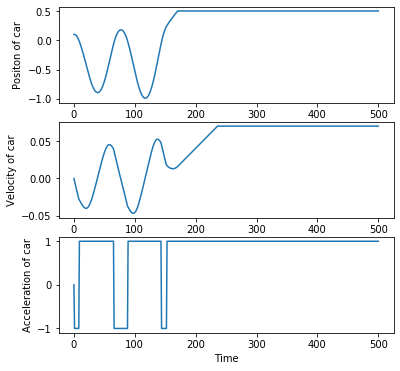

In [24]:
## Initialize the car state
a = [0.0]
x_dot = [-0.0]
x = [0.1]
print('Starting positon = ' + str(x[0]))

## Iterate until termination
i = 0    
done = False
#while not done:
for i in range(500):    
    ## Update the position and velocity    
    x_temp, x_dot_temp, action, done = policy_time_step(x[i],x_dot[i],double_DQNModel,actions)
    x.append(x_temp)
    x_dot.append(x_dot_temp)
    a.append(action)
          
plot_car_a(x,x_dot,a)         

## Prioritized Replay

The samples contained in the replay buffer, for the DQN and double DQN algorithms described above, uses a **first in and first out** algorithm. Samples are cleared from the buffer based on age alone. 

Is there a better way to manage the replay buffer to improve the learning rate? There is, an algorithm know as **prioritized replay**. The basic idea is to prioritize the sampling of the replay buffer based on the value of the sample in reducing the error in learning the action-value function, $\hat{Q}(s_t, a_t, \mathbf{w}_t)$. This approach is know as **importance sampling**. 

A possible proxy for the importance of a sample is the absolute value of the TD error:   

$$p_i = |\delta_t| = |R_{t+1} + \gamma\ \underset{a}{max}\ Q_{\pi}(s_{t+1},a_{t+1}) - \hat{Q}(s_t, a_t, \mathbf{w}_t)|$$

This prioritization is deterministic. But, the measure of TD error is only an estimate and subject to noise. The end result is that the above formulation has a tendency to over emphasize samples with larger TD errors. 

A stochastic approach is more suitable. The sampling probability, $P(i)$, of a data case is then expressed:

$$P(i) = \frac{p_i^a}{\sum_k p_k^a}$$    

The exponent, $\alpha$, determines the degree of prioritization. When $\alpha = 0$ the sampling distribution is uniform, the case already discussed. The closer  $\alpha$ is to 1 the more sensitive the sampling distribution is to TD error.  

Using importance sampled data introduces bias in learning. The bias arises since some data cases are more likely to occur than others. The adjustment for this bias is to use **importance sampling weighting** which can be computed as follows:

$$w_i = \frac{1}{max_i(w_i)}\Big( \frac{1}{N\ P(i)} \Big)^\beta$$   

The sampling weights are normalized by multiplying by 1/$max_i(w_i)$. If $\beta = 1$, this formulation compensates for sampling bias. The **adjusted TD error** becomes $w_i \delta_i$.  

Using these normalized sampling weights, the mini-batches for stochastic gradient decent algorithm use the most important data samples. This sampling greatly improves the learning rate.     

#### Copyright 2018, 2019, Stephen F. Elston. All rights reserved.